In [3]:
import scipy
import pylab
import os
import gc
import pprint
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import astropy.io.fits as fits
from astropy import units as u
from astropy.wcs import WCS
import pyspeckit
#import analysis as an
import pyneb as pn
from spectral_cube import SpectralCube 
import sklearn
from sklearn.decomposition import PCA
from reproject import reproject_interp

%matplotlib inline
                                            # Suppress warnings we don't care about:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

                                            # LaTeX:
matplotlib.rc('text', usetex=True)
#matplotlib.rc('font', family='sans-serif')
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
#if not working: in terminal where launch jupyter notebook run
#export PATH=$PATH:/Library/TeX/texbin/latex

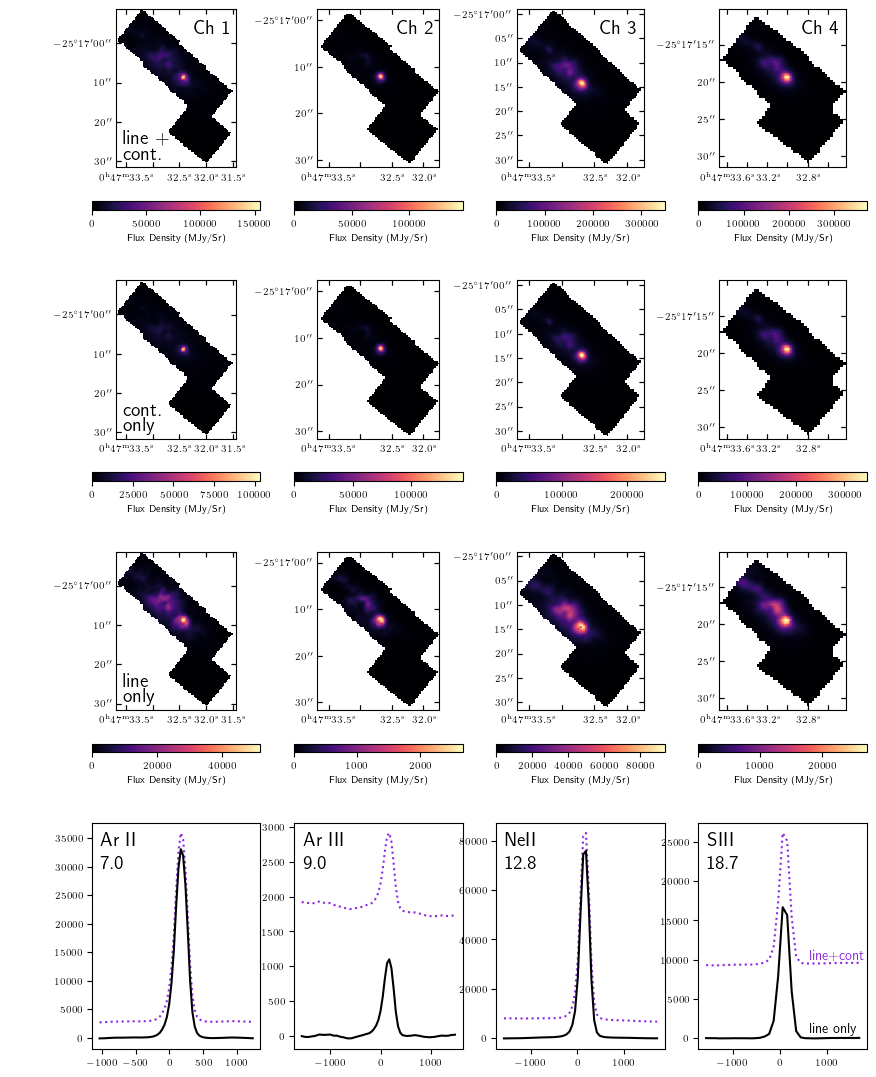

In [80]:
lines = np.array(['NGC253_ArII_7.0','NGC253_ArIII_9.0','NGC253_NeII_12.8','NGC253_SIII_18.7',])
names = np.array(['Ar II','Ar III','NeII','SIII'])
lams = np.array(['7.0','9.0','12.8','18.7'])
chs = np.array(['Ch 1','Ch 2','Ch 3','Ch 4'])
plt.figure(figsize=(10,13.5))

for i, line in enumerate(lines):
    sc1 = SpectralCube.read(line+'.fits')
    vels = np.arange(sc1.header["NAXIS3"])*sc1.header["CDELT3"]+sc1.header["CRVAL3"]-sc1.header["CRPIX3"]*sc1.header["CDELT3"]
    sc2 = SpectralCube.read(line+'.line.fits')
    sc3 = SpectralCube.read(line+'.cont.fits')
    moment0 = sc1.moment(order=0,how='slice')
    mean  = sc1.apply_numpy_function(np.nanmean,axis=0) 
    #moment_0l  = sc2.moment(order=0,how='slice')
    meanl = sc2.apply_numpy_function(np.nanmean,axis=0)
    #moment_0c  = sc3.moment(order=0,how='slice')
    meanc = sc3.apply_numpy_function(np.nanmean,axis=0)
    ax1 = plt.subplot(4,4,i+1,projection=moment_0.wcs)
    im1 = plt.imshow(mean.data,cmap='magma',vmin=0)
    cb1 = plt.colorbar(im1, orientation="horizontal")
    cb1.set_label(label='Flux Density (MJy/Sr)',fontsize=7) 
    cb1.ax.tick_params(which = 'major', labelsize = 7) 
    lon = ax1.coords[0]
    lat = ax1.coords[1]
    lon.set_ticklabel(size=7,exclude_overlapping=True)
    lat.set_ticklabel(size=7,exclude_overlapping=True)
    ax1.tick_params(direction='in')
    plt.xlabel(" ")
    plt.ylabel(" ") 
    plt.annotate(chs[i],xy=(0.65,0.85),xycoords="axes fraction",fontsize=14)
    if i==0:
        plt.annotate('line +',xy=(0.06, 0.15),xycoords="axes fraction",fontsize=14)
        plt.annotate('cont.',xy=(0.06, 0.05),xycoords="axes fraction",fontsize=14)
    ax2 = plt.subplot(4,4,i+5,projection=moment_0.wcs)
    im2=plt.imshow(meanc.data,cmap='magma',vmin=0)
    cb2 = plt.colorbar(im2, orientation="horizontal")
    cb2.set_label(label='Flux Density (MJy/Sr)',fontsize=7) 
    cb2.ax.tick_params(which = 'major', labelsize = 7) 
    lon = ax2.coords[0]
    lat = ax2.coords[1]
    lon.set_ticklabel(size=7,exclude_overlapping=True)
    lat.set_ticklabel(size=7,exclude_overlapping=True)
    ax2.tick_params(direction='in')
    plt.xlabel(" ")
    plt.ylabel(" ") 
    if i==0:
        plt.annotate('cont. ',xy=(0.06, 0.15),xycoords="axes fraction",fontsize=14)
        plt.annotate('only',xy=(0.06, 0.05),xycoords="axes fraction",fontsize=14)
    ax3 = plt.subplot(4,4,i+9,projection=moment_0.wcs)
    im3=plt.imshow(meanl.data,cmap='magma',vmin=0)
    cb3 = plt.colorbar(im3, orientation="horizontal")
    cb3.set_label(label='Flux Density (MJy/Sr)',fontsize=7) 
    cb3.ax.tick_params(which = 'major', labelsize = 7) 
    lon = ax3.coords[0]
    lat = ax3.coords[1]
    lon.set_ticklabel(size=7,exclude_overlapping=True)
    lat.set_ticklabel(size=7,exclude_overlapping=True)
    ax3.tick_params(direction='in')
    plt.xlabel(" ")
    plt.ylabel(" ") 
    if i==0:
        plt.annotate('line ',xy=(0.06, 0.15),xycoords="axes fraction",fontsize=14)
        plt.annotate('only',xy=(0.06, 0.05),xycoords="axes fraction",fontsize=14)
    ax4 = plt.subplot(4,4,i+13)
    plt.plot(vels,np.nanmean(sc1,axis=(1,2)),color='blueviolet',ls=':')
    plt.plot(vels,np.nanmean(sc2,axis=(1,2)),color='black')
    ax4.tick_params(axis='both', which='major', labelsize=7)
    plt.annotate(names[i],xy=(0.05, 0.9),xycoords="axes fraction",fontsize=14)
    plt.annotate(lams[i],xy=(0.05, 0.8),xycoords="axes fraction",fontsize=14)
    if i==3:
        plt.annotate('line+cont',xy=(650,10000),fontsize=10,color='blueviolet')
        plt.annotate('line only',xy=(650,750),fontsize=10,color='black')
plt.savefig('line_sub.pdf')

3.6111109786563e-05


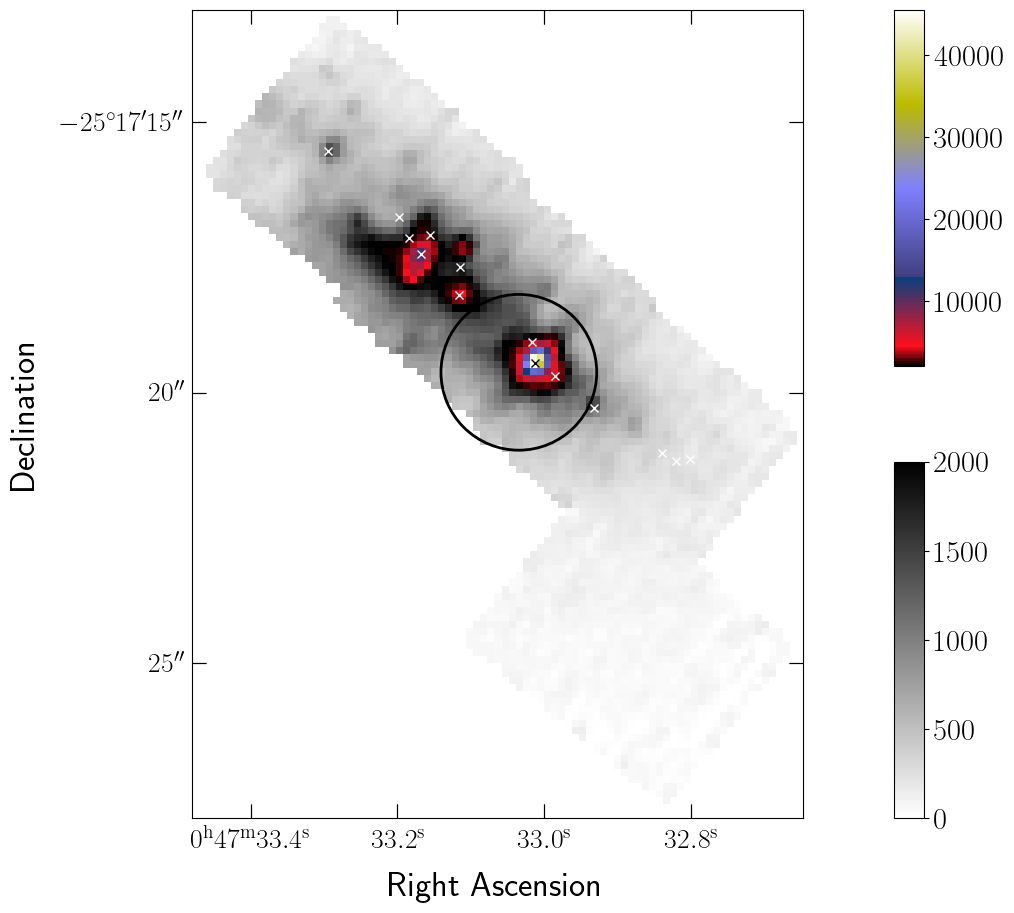

In [101]:
fig2 = plt.figure(figsize=(9.5,10.5))

sc1 = SpectralCube.read("NGC253_sky_v1_17_1_ch1-shortmediumlong_s3d.fits",hdu=1)

ch1 = fits.getdata('NGC253_sky_v1_17_1_ch1-shortmediumlong_s3d.fits',hdu=1)
ch1head = sc1.header

w = sc1.wcs

w = w.dropaxis(2)


xs = pylab.zeros((14),float)
ys = pylab.zeros((14),float)
sources = pylab.array(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
RAs =  pylab.array([11.886669,
                    11.886749,
                    11.886829,
                    11.8872162,
                    11.8874364,
                    11.88755,
                    11.887567,
                    11.887978,
                    11.887984,
                    11.8881464,
                    11.8882,
                    11.888264,
                    11.888322,
                    11.8887287])
Decs = pylab.array([-25.289232,
                    -25.289240,
                    -25.289200,
                    -25.2889692,
                    -25.288806,
                    -25.288737,
                    -25.288628,
                    -25.288244,
                    -25.288389,
                    -25.2880799,
                    -25.288175,
                    -25.288095,
                    -25.287989,
                    -25.2876482])    
for i in np.arange(0,14):
    xs[i],ys[i] = w.all_world2pix(RAs[i],Decs[i],0)

sx,sy = w.all_world2pix(11.8876425,-25.2887846,0)
apsize_s = 0.0008/ch1head['CDELT2']
print(ch1head['CDELT2'])

array = np.copy(ch1[0])
array[array<2000] = np.nan

gs2 = fig2.add_gridspec(3, 3, height_ratios=[1,0.0001,1], width_ratios=[1.0, 0.00001,0.05])

ax2 = fig2.add_subplot(gs2[:, 0],projection=w)

ra1,dec1 = w.all_pix2world(0,0,0)
ra2,dec2 = w.all_pix2world(array.shape[1],array.shape[0],0)


lon2 = ax2.coords[0]
lat2 = ax2.coords[1]

#lon2.set_major_formatter('hh:mm:ss.s')
lon2.set_ticklabel(size=20)
lat2.set_ticklabel(size=20)
lon2.set_ticks(size=-10)
lat2.set_ticks(size=-10)
lon2.tick_params(pad=15)
lat2.tick_params(pad=15)

ima = plt.imshow(ch1[0],cmap='gray_r',vmin=0,vmax=2000)
imb = plt.imshow(array,cmap='gist_stern',vmin=2000)
plt.plot(xs,ys,'x',color='white')
plt.plot(xs[5],ys[5],'x',color='black')
#plt.plot(array.shape[1],array.shape[0],'o',color='red',ms=5)

ax2.add_patch(matplotlib.patches.Circle((sx,sy),apsize_s/2,fill=False,lw=2,edgecolor='black'))

plt.xlabel("Right Ascension ",fontsize=25)
plt.ylabel('Declination ',fontsize=25)

caxa = fig2.add_subplot(gs2[-1, -1])
fig2.colorbar(ima, cax=caxa, orientation='vertical')

caxb = fig2.add_subplot(gs2[0, -1])
fig2.colorbar(imb, cax=caxb, orientation='vertical')




plt.savefig('shell_panel1.pdf',bbox_inches='tight')

836.7011337303767 1213.7032780757484 595.4928976509655 1093.8245791596569


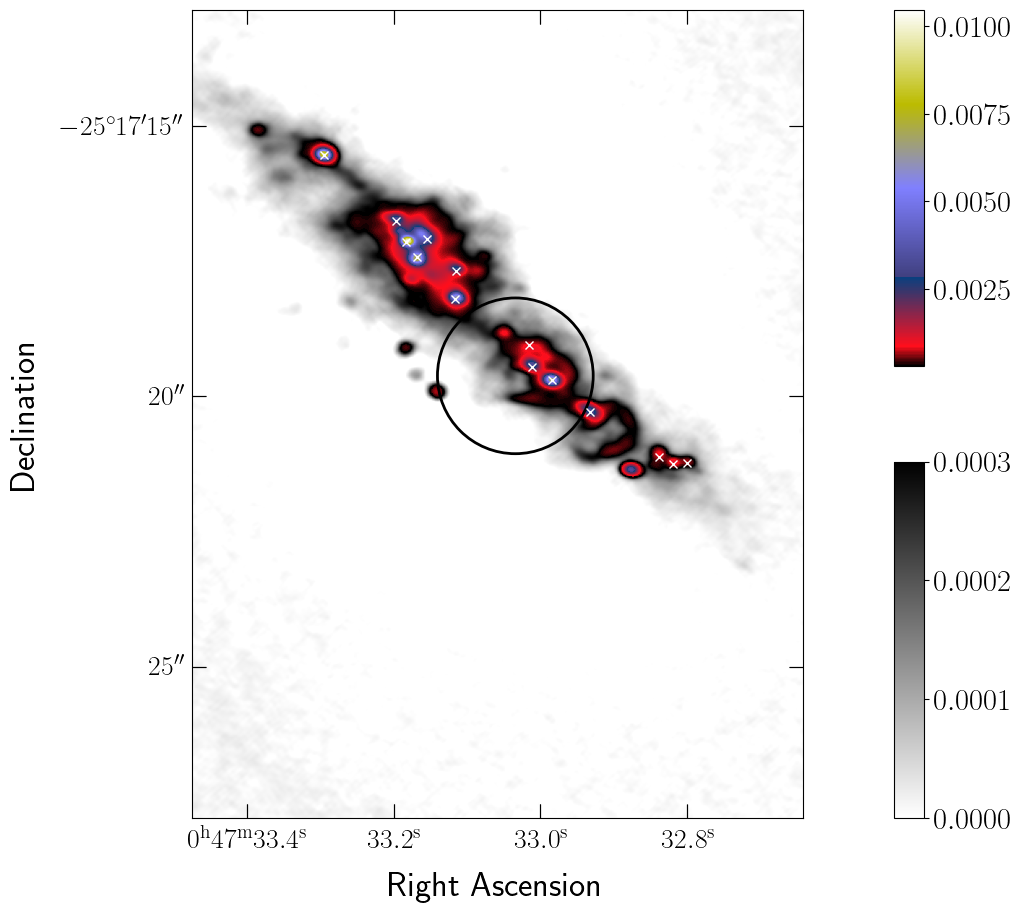

In [105]:
fig2 = plt.figure(figsize=(9.5,10.5))

alma = fits.getdata('NGC_253_ALMA_Band3_continuum_full_image.fits')
almahead = fits.getheader('NGC_253_ALMA_Band3_continuum_full_image.fits')
w2 = WCS(almahead)
w2 = w2.dropaxis(3)
w2 = w2.dropaxis(2)


x2s = pylab.zeros((14),float)
y2s = pylab.zeros((14),float)
   
for i in np.arange(0,14):
    x2s[i],y2s[i] = w2.all_world2pix(RAs[i],Decs[i],0)


sx2,sy2 = w2.all_world2pix(11.8876425,-25.2887846,0)
apsize_s2 = 0.0008/almahead['CDELT2']


array = np.copy(alma)
array[array<0.0003] = np.nan

gs2 = fig2.add_gridspec(3, 3, height_ratios=[1,0.0001,1], width_ratios=[1.0, 0.00001,0.05])

ax2 = fig2.add_subplot(gs2[:, 0],projection=w2)
lon2 = ax2.coords[0]
lat2 = ax2.coords[1]



x1,y1 = w2.all_world2pix(ra1,dec1,0)
x2,y2 = w2.all_world2pix(ra2,dec2,0)
print(x1,x2,y1,y2)
ax2.set_xlim(x1,x2)
ax2.set_ylim(y1,y2)

#lon2.set_major_formatter('hh:mm:ss.s')
lon2.set_ticklabel(size=20)
lat2.set_ticklabel(size=20)
lon2.set_ticks(size=-10)
lat2.set_ticks(size=-10)
lon2.tick_params(pad=15)
lat2.tick_params(pad=15)

ima = plt.imshow(np.squeeze(alma),cmap='gray_r',vmin=0,vmax=0.0003)
imb = plt.imshow(np.squeeze(array),cmap='gist_stern',vmin=0.0003)
plt.plot(x2s,y2s,'x',color='white')

ax2.add_patch(matplotlib.patches.Circle((sx2,sy2),apsize_s2/2,fill=False,lw=2,edgecolor='black'))

#ima = plt.imshow(np.flipud(pvslice.data),cmap='gray_r',extent=extent,aspect='auto',vmin=0,vmax=0.005)
#imb = plt.imshow(np.flipud(array),cmap='gist_stern',extent=extent,aspect='auto',vmin=0.005)

#plt.colorbar()
#plt.scatter(cxs,cys,marker='x',s=50,linewidth=1.5,c='orange') #
plt.xlabel("Right Ascension ",fontsize=25)
plt.ylabel('Declination ',fontsize=25)



caxa = fig2.add_subplot(gs2[-1, -1])
fig2.colorbar(ima, cax=caxa, orientation='vertical')

caxb = fig2.add_subplot(gs2[0, -1])
fig2.colorbar(imb, cax=caxb, orientation='vertical')

#ax2.set_xlim(50, array.shape[1] - 50)
#ax2.set_ylim(50, array.shape[0] - 50)

plt.savefig('shell_panel3.pdf',bbox_inches='tight')

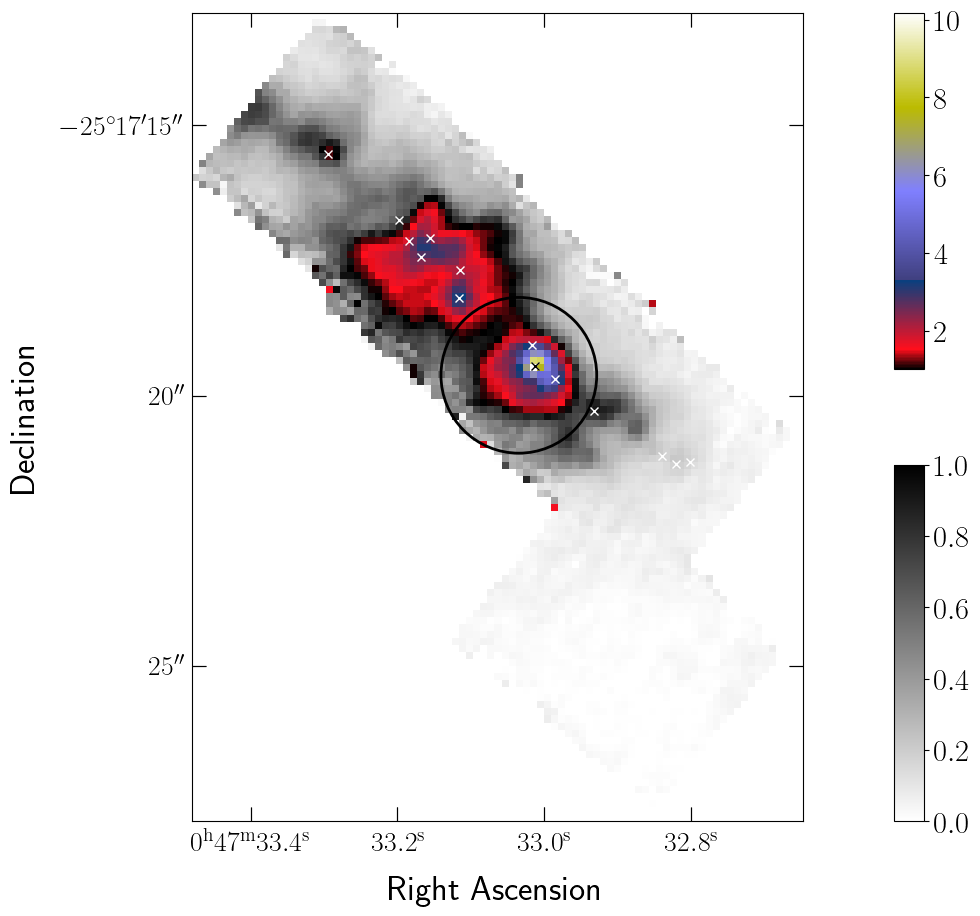

In [106]:
fig3 = plt.figure(figsize=(9.5,10.5))

cube = SpectralCube.read("NGC253_H5a_7.4.line.fits")
h5a = fits.getdata("NGC253_H5a.line.moment.integrated.fits")
h5ahead = fits.getheader('NGC253_H5a.line.moment.integrated.fits')
w3 = cube.wcs
w3 = w3.dropaxis(2)

x3s = pylab.zeros((14),float)
y3s = pylab.zeros((14),float)
for i in np.arange(0,14):
    x3s[i],y3s[i] = w3.all_world2pix(RAs[i],Decs[i],0)

sx3,sy3 = w3.all_world2pix(11.8876425,-25.2887846,0)
apsize_s3 = 0.0008/h5ahead['CDELT2']

array = np.copy(h5a[0])
array[array<1e6] = np.nan

gs2 = fig3.add_gridspec(3, 3, height_ratios=[1,0.0001,1], width_ratios=[1.0, 0.00001,0.05])
ax2 = fig3.add_subplot(gs2[:, 0],projection=w3)

ra1,dec1 = w3.all_pix2world(0,0,0)
ra2,dec2 = w3.all_pix2world(array.shape[1],array.shape[0],0)


lon2 = ax2.coords[0]
lat2 = ax2.coords[1]

#lon2.set_major_formatter('hh:mm:ss.s')
lon2.set_ticklabel(size=20)
lat2.set_ticklabel(size=20)
lon2.set_ticks(size=-10)
lat2.set_ticks(size=-10)
lon2.tick_params(pad=15)
lat2.tick_params(pad=15)

ima = plt.imshow(h5a[0]/1e6,cmap='gray_r',vmin=0,vmax=1)
imb = plt.imshow(array/1e6,cmap='gist_stern',vmin=1)
plt.plot(xs,ys,'x',color='white')
plt.plot(xs[5],ys[5],'x',color='black')
#plt.plot(array.shape[1],array.shape[0],'o',color='red',ms=5)

ax2.add_patch(matplotlib.patches.Circle((sx,sy),apsize_s/2,fill=False,lw=2,edgecolor='black'))

plt.xlabel("Right Ascension ",fontsize=25)
plt.ylabel('Declination ',fontsize=25)

caxa = fig3.add_subplot(gs2[-1, -1])
fig3.colorbar(ima, cax=caxa, orientation='vertical')

caxb = fig3.add_subplot(gs2[0, -1])
fig3.colorbar(imb, cax=caxb, orientation='vertical')

plt.savefig('shell_panel2.pdf',bbox_inches='tight')